In [1]:
#installing kaggle library
!pip install kaggle

In [2]:
#creating the .kaggle folder in the root directory
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
# set permissions
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download mr3suvhro/covid-19-xray-image-dataset-with-huge-samples

100% 476M/478M [00:06<00:00, 135MB/s]
100% 478M/478M [00:06<00:00, 76.0MB/s]


In [7]:
! unzip covid-19-xray-image-dataset-with-huge-samples

Archive:  covid-19-xray-image-dataset-with-huge-samples.zip
replace COVID/test/Covid Negative/person10_bacteria_43.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from PIL import Image
import os

import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

class_names=["Covid Negative","Covid Positive"]

In [9]:
generator = image.ImageDataGenerator(rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest",
      validation_split = 0.2)

train_datagen = generator.flow_from_directory("/content/COVID/train",target_size=(150,150),class_mode='binary',subset ="training",batch_size=20, seed=42)
val_datagen = generator.flow_from_directory("/content/COVID/train",target_size=(150,150),class_mode='binary',subset ="validation",batch_size=20, seed=42)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


7
Covid Negative


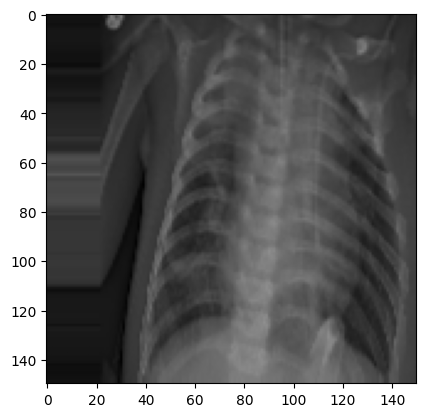

In [10]:
i = int(input())
plt.imshow(train_datagen[0][0][i])
print(class_names[int(train_datagen[0][1][i])])

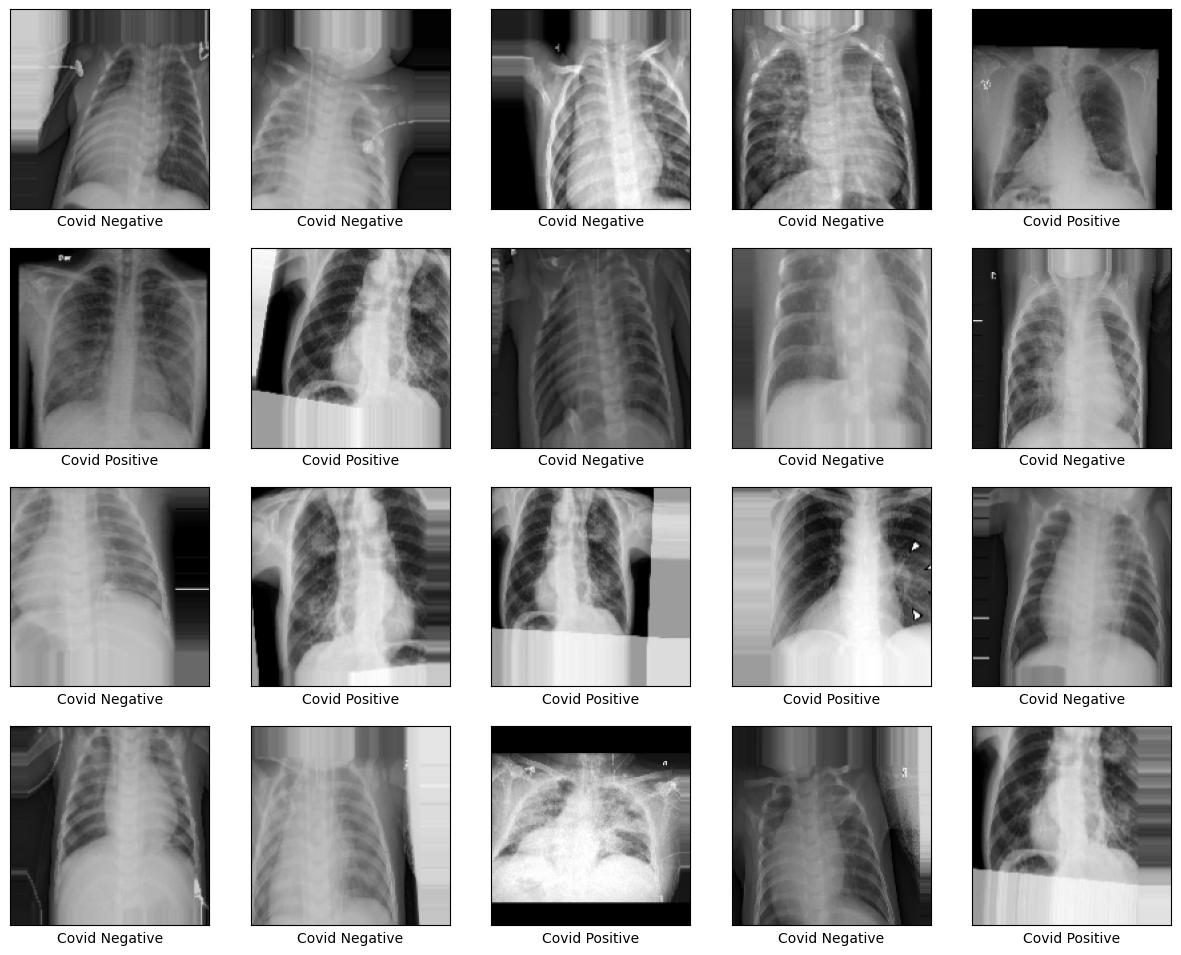

In [11]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_datagen[0][0][i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_datagen[0][1][i])])
plt.show()

In [12]:
import tensorflow as tf
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

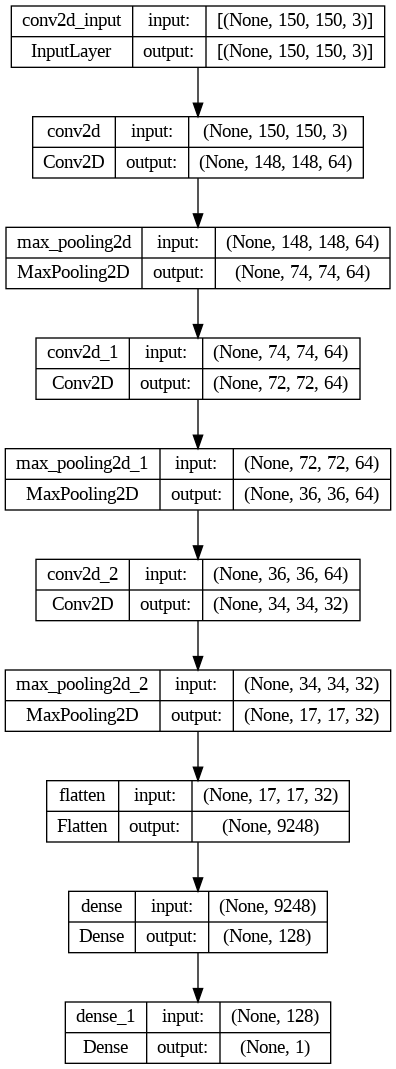

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics = ['accuracy','Precision','Recall',])

In [ ]:
history = model.fit(train_datagen,validation_data=val_datagen,epochs = 20)

Epoch 1/20
80/80 [==============================] - 204s 3s/step - loss: 0.4902 - accuracy: 0.7606 - precision: 0.7610 - recall: 0.7600 - val_loss: 0.3838 - val_accuracy: 0.8475 - val_precision: 0.8564 - val_recall: 0.8350
Epoch 2/20
80/80 [==============================] - 176s 2s/step - loss: 0.2910 - accuracy: 0.8900 - precision: 0.8959 - recall: 0.8825 - val_loss: 0.3468 - val_accuracy: 0.9025 - val_precision: 0.9259 - val_recall: 0.8750
Epoch 3/20
80/80 [==============================] - 173s 2s/step - loss: 0.2572 - accuracy: 0.9006 - precision: 0.9125 - recall: 0.8863 - val_loss: 0.2365 - val_accuracy: 0.9100 - val_precision: 0.9100 - val_recall: 0.9100
Epoch 4/20
80/80 [==============================] - 168s 2s/step - loss: 0.1830 - accuracy: 0.9337 - precision: 0.9370 - recall: 0.9300 - val_loss: 0.3051 - val_accuracy: 0.8850 - val_precision: 0.9278 - val_recall: 0.8350
Epoch 5/20
80/80 [==============================] - 164s 2s/step - loss: 0.1807 - accuracy: 0.9394 - precisi

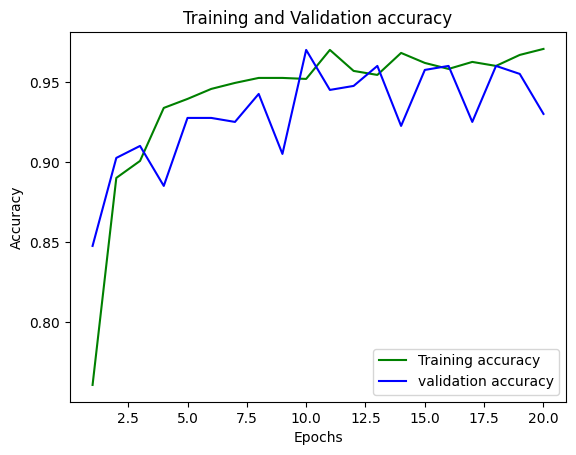

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

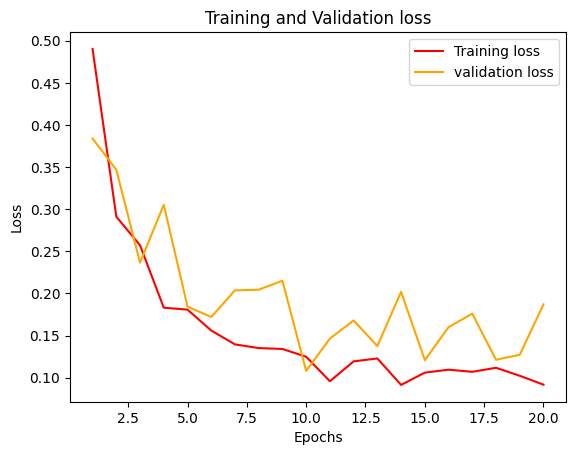

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

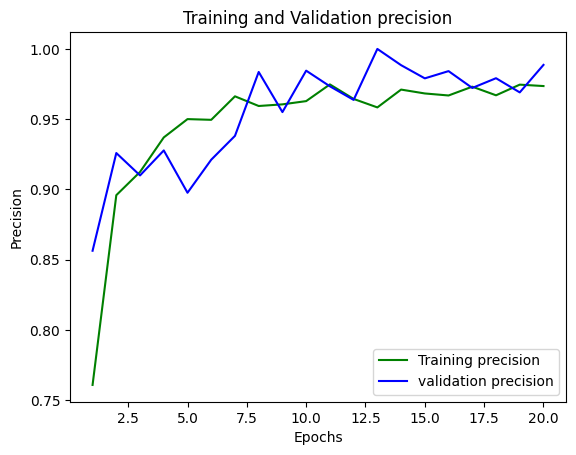

In [ ]:
precision= history.history['precision']
val_precision = history.history['val_precision']
epochs = range(1,21)
plt.plot(epochs, precision, 'g', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

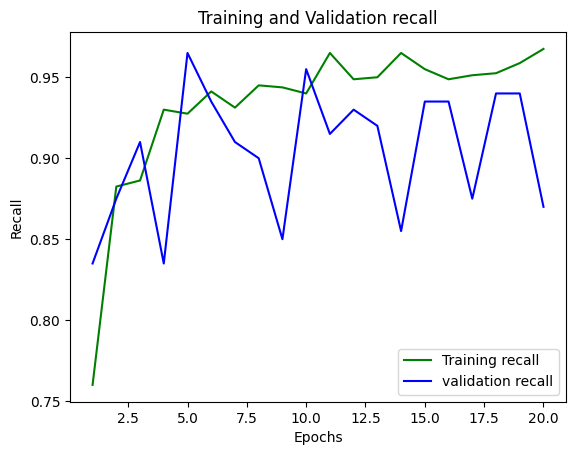

In [ ]:
recall = history.history['recall']
val_recall = history.history['val_recall']
epochs = range(1,21)
plt.plot(epochs, recall, 'g', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='validation recall')
plt.title('Training and Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
test_generator = generator.flow_from_directory("/content/COVID/test",target_size=(150,150),class_mode='binary',batch_size=20, seed=42)

predictions=model.predict_generator(test_generator)
#pred
model.evaluate(test_generator)

Found 328 images belonging to 2 classes.


<ipython-input-25-647e28f540c6>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


17/17 [==============================] - 13s 756ms/step - loss: 0.1963 - accuracy: 0.9268 - precision: 0.9930 - recall: 0.8598


[0.19628797471523285,
 0.9268292784690857,
 0.9929577708244324,
 0.8597561120986938]

In [ ]:
model.save('my_model.h5')